In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Creating own data
X,y = make_circles(n_samples = 1000, noise = 0.05 , factor = 0.5 , random_state=42)

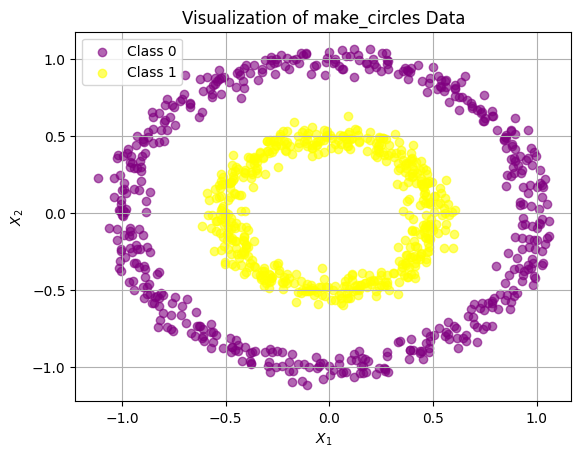

In [ ]:
# Creating a scatter plot
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.6,color = 'purple')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.6, color = 'yellow')
plt.title('Visualization of make_circles Data')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid(True)

In [ ]:
def plot_graph(model, X, y, title):
  # Step 1: Create a grid (the background map) from -1.5 to 1.5
  # We use 100 points for x and 100 points for y
  grid = np.linspace(-1.5, 1.5, 100)
  xx, yy = np.meshgrid(grid, grid)

  # Step 2: Flatten the grid to pass it into the model
  # ".ravel()" flattens the array, "np.column_stack" puts them together
  all_points = np.column_stack([xx.ravel(), yy.ravel()])

  # Step 3: Predict the color for every point on the grid
  preds = model.predict(all_points, verbose=0)
  Z = preds.round().reshape(xx.shape)

  # Step 4: Draw the background colors and the actual data dots
  plt.contourf(xx, yy, Z, alpha=0.3)# Background
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k') # Data dots
  plt.title(title)

In [ ]:
slp_model = Sequential([
    Dense(1, input_shape = (2,), activation = 'sigmoid')
])
# We can use sequential to make neural networks , slp ( single layer perceptron ) and dense is number of layers we require we pass it as a tuple !
slp_model.compile(loss='binary_crossentropy', metrics=['accuracy'])
slp_model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4887 - loss: 0.6934
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5157 - loss: 0.6923
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4855 - loss: 0.6938
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4977 - loss: 0.6934
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 0.6940 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5224 - loss: 0.6930 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5154 - loss: 0.6927
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4719 - loss: 0.6938 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4974 - loss: 0.6931 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 0.6931
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4653 - loss: 0.6943
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 0.6

In [ ]:
# Calculate final accuracy
slp_loss, slp_acc = slp_model.evaluate(X, y, verbose=0)
print(f"SLP Accuracy: {slp_acc*100:.2f}%")

SLP Accuracy: 49.50%


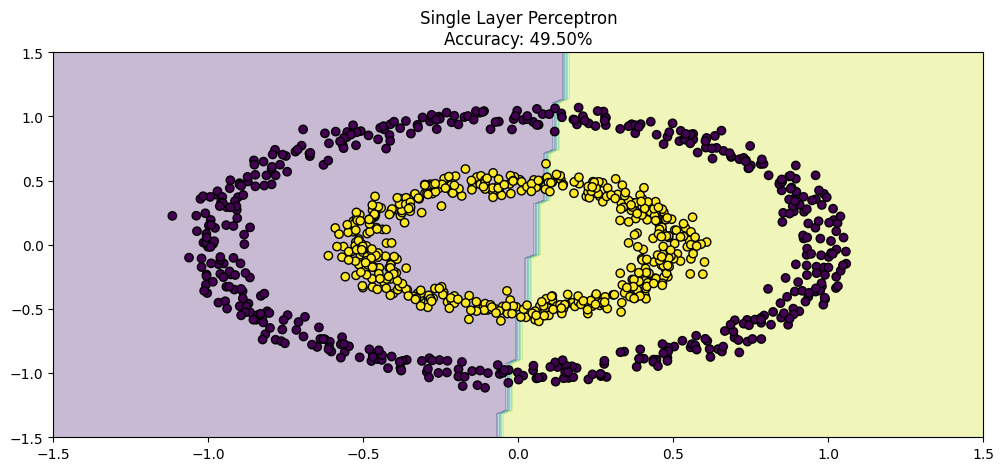

In [ ]:
plt.figure(figsize=(12, 5))

plot_graph(slp_model, X, y, title=f"Single Layer Perceptron\nAccuracy: {slp_acc*100:.2f}%")

In [ ]:
# Multilayer percepton
mlp_model = Sequential([
    Dense(16,input_shape = (2,), activation = 'relu'), #Hidden layer 1
    Dense(16,activation='relu'), #Hidden layer 2
    Dense(1, activation = 'sigmoid')
])
mlp_model.compile(loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4842 - loss: 0.6737
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5242 - loss: 0.6520
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6051 - loss: 0.6344
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 0.6004
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.5696
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9308 - loss: 0.5321
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.4950
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.4470
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3967
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3476
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2973
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2594


MLP Accuracy: 100.00%


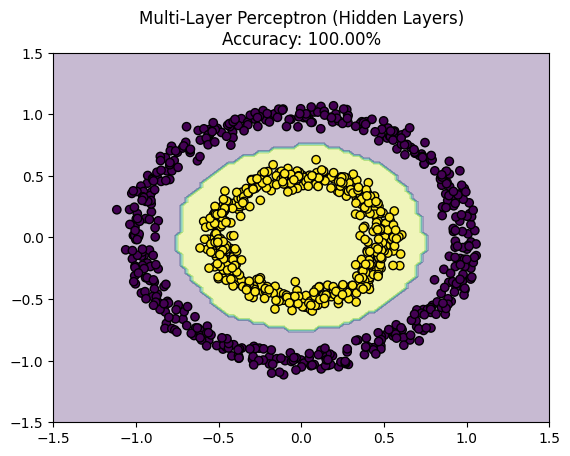

In [ ]:
# Calculate final accuracy
mlp_loss, mlp_acc = mlp_model.evaluate(X, y, verbose=0)
print(f"MLP Accuracy: {mlp_acc*100:.2f}%")
plot_graph(mlp_model, X, y, title=f"Multi-Layer Perceptron (Hidden Layers)\nAccuracy: {mlp_acc*100:.2f}%")

plt.show()